In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [4]:
# read in csv and check
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

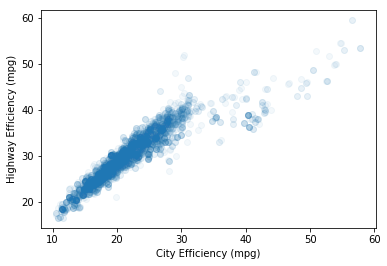

In [25]:
# scatter plot of city efficiency and highway efficiency using transparancy
plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 0.05);
plt.xlabel('City Efficiency (mpg)')
plt.ylabel('Highway Efficiency (mpg)');

**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

In [13]:
# checking value ranges for displ and co2 to create discrete bins
fuel_econ[['displ', 'co2']].describe()

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


In [44]:
# creating Sturges' rule bins of 10x10ish (technically 9x9)
bins_x = np.arange(.6, 7 + .7, .7)
bins_y = np.arange(29, 692 + 74, 74)

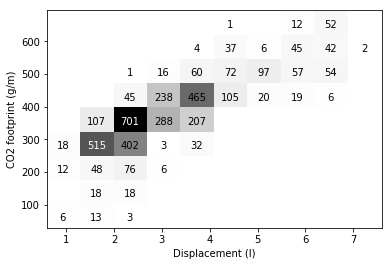

In [45]:
# heatmap with discrete bins and text annotations 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', cmap = 'Greys', bins = [bins_x, bins_y]);
counts = h2d[0]
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 footprint (g/m)');

# loop for text annotations
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 500:
            plt.text(bins_x[i]+0.33, bins_y[j]+30, int(c), ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.33, bins_y[j]+30, int(c), ha = 'center', va = 'center', color = 'black')

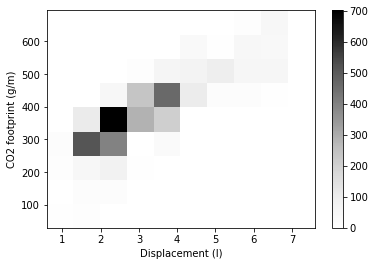

In [46]:
# alternate heatmap with colorbar instead of text annotations
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', cmap = 'Greys', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 footprint (g/m)');